In [5]:
import numpy as np
from onsort.my_sort import NaiveInfinitesimalSort, InfinitesimalSort
optimal = InfinitesimalSort()
naive = NaiveInfinitesimalSort()

In [4]:
cd ..

/home/pablo/Documents/code/active/sorting_algorithm


/home/pablo/Documents/code/active/sorting_algorithm/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


ImportError: cannot import name 'common_texification' from 'matplotlib.backends.backend_pgf' (/home/pablo/Documents/code/active/sorting_algorithm/.venv/lib/python3.12/site-packages/matplotlib/backends/backend_pgf.py)

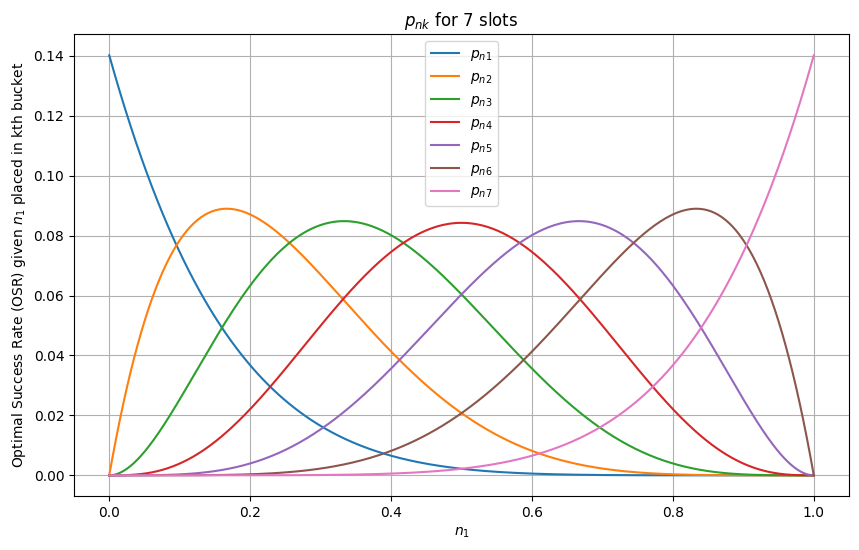

In [6]:
optimal.plot_strategy_domains(7)
optimal.plot_strategy_domains_at_optimal_range(7)

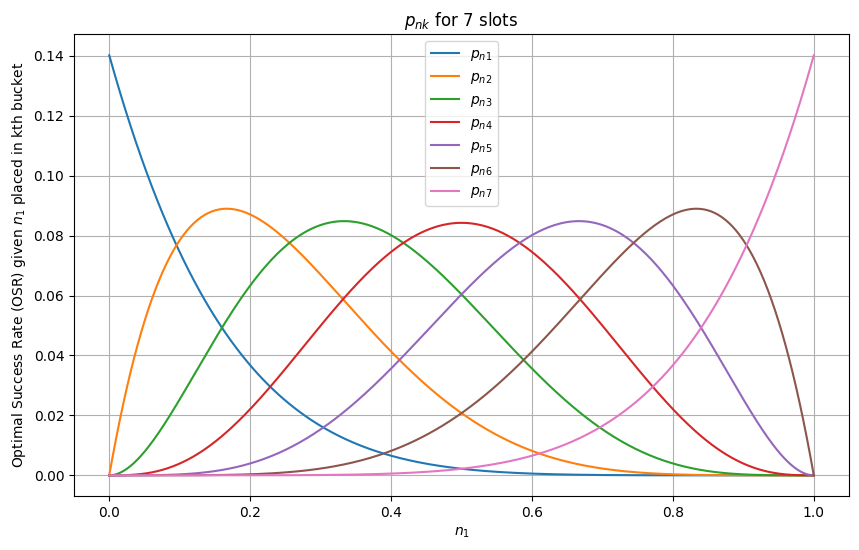

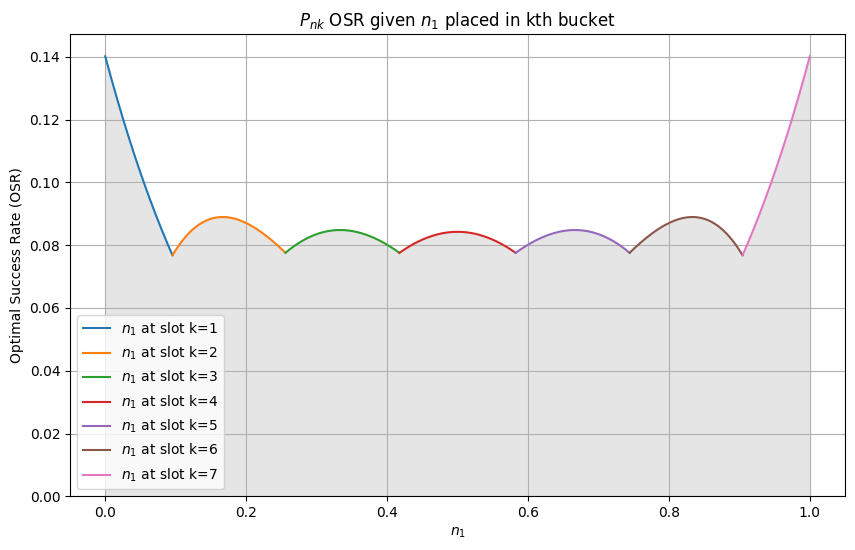

KeyboardInterrupt: 

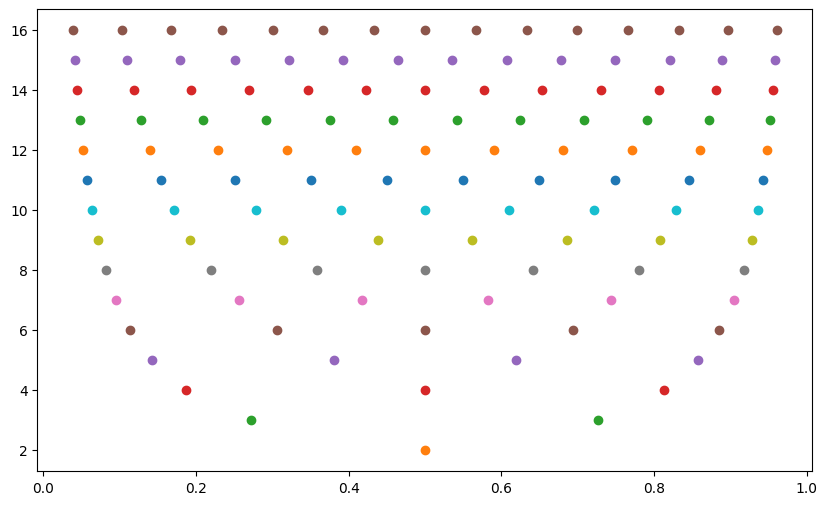

In [12]:

optimal.plot_partition_tree(20)
optimal.plot_OSR(20)
naive.plot_strategy_domains(7)
naive.plot_strategy_domains_at_optimal_range(7)
naive.plot_partition_tree(20)
naive.plot_OSR(20)

In [35]:
def best_quasi_sort(arr, tresholds= None):
    ''' Uses thresholds to sort the array into slots, if slot occupied,'''
    arr = np.array(arr)
    n = len(arr)
    slots = np.zeros(n)
    if tresholds is None:
        tresholds = InfinitesimalSort().thresholds(n)[1] 

    for i, ni in enumerate(arr):
        idx = index_from_tresholds(tresholds, ni)
        if slots[idx] != 0:
            slots[slots == 0] = best_quasi_sort(arr[i:])
            break
        else:
            slots[idx] = ni
    return slots

In [57]:
np.array([0.03, 0 , 0.1, 0.2, 0, 0 , 0.9])

array([0.03, 0.  , 0.05, 0.  , 0.  , 6.  ])

In [20]:
from matplotlib import pyplot as plt
import numpy as np

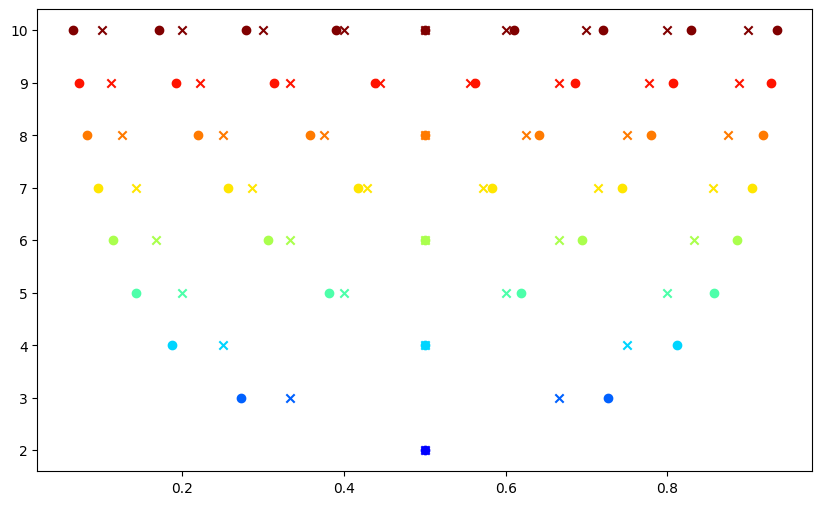

In [184]:
colors = plt.cm.jet(np.linspace(0, 1, 10))
n = 10
plt.figure(figsize=(10, 6))
for idx, i in enumerate(range(1, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    plt.scatter(x_advance,y, color=colors[idx], marker='o' )
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.scatter(x_simple,y, color=colors[idx], marker='x', label=f'Naive {i}' if idx == 0 else "")


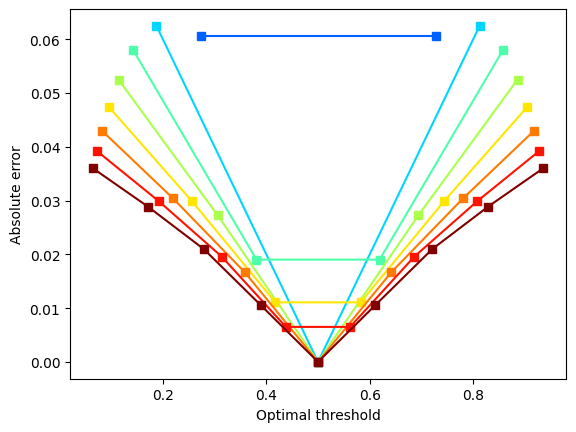

In [186]:
n=10
for idx, i in enumerate(range(1, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.plot(x_advance, np.abs((x_advance-x_simple)), color=colors[idx], marker='s' )
    plt.xlabel('Optimal threshold')
    plt.ylabel('Absolute error')
plt.show()

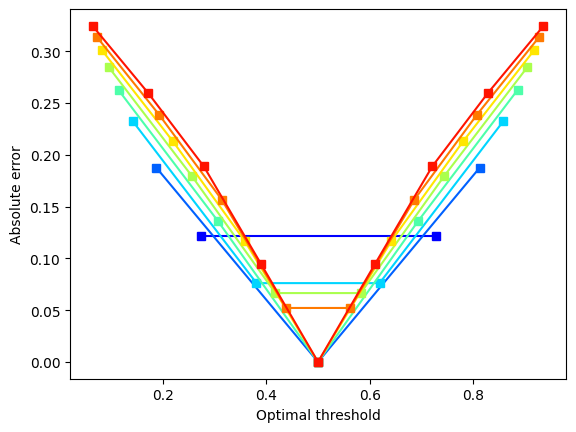

In [188]:
n=10
for idx, i in enumerate(range(2, n+1)):
    y = [i]*(i-1)
    x_advance = np.array(sorti.thresholds(i)[1]).astype(float)
    x_simple = np.linspace(0, 1, i+1)[1:-1]
    plt.plot(x_advance, np.abs((x_advance-x_simple)/(1/(i-1))), color=colors[idx], marker='s' )
    plt.xlabel('Optimal threshold')
    plt.ylabel('Absolute error')
plt.show()

In [ ]:
i1 = InfinitesimalSort()
i2 = InfinitesimalSort2()

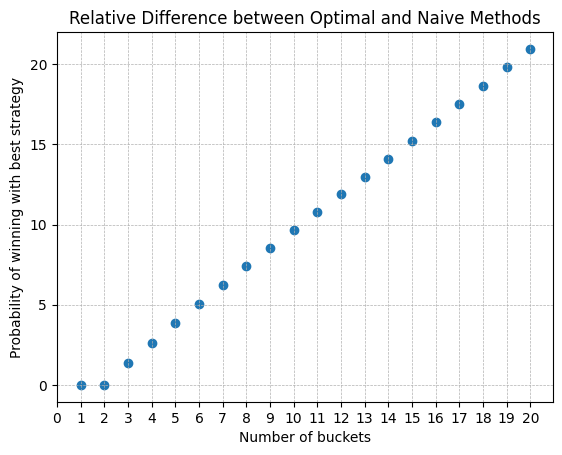

In [37]:
n = 20
x =  range(1, n+1)
optimal = np.array([i1.mP(i) for i in x])
naive = np.array([i2.mP(i) for i in x])

plt.scatter(x, 100*np.abs(naive.astype(float)-optimal.astype(float))/naive.astype(float))
# plt.scatter(x, np.log10(prob2.astype(float)))
# plt.ylim([0,1])
plt.title("Relative Difference between Optimal and Naive Methods")
plt.xlabel('Number of buckets')
plt.ylabel('Probability of winning with best strategy')
plt.xticks(np.arange(0, n+1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
        

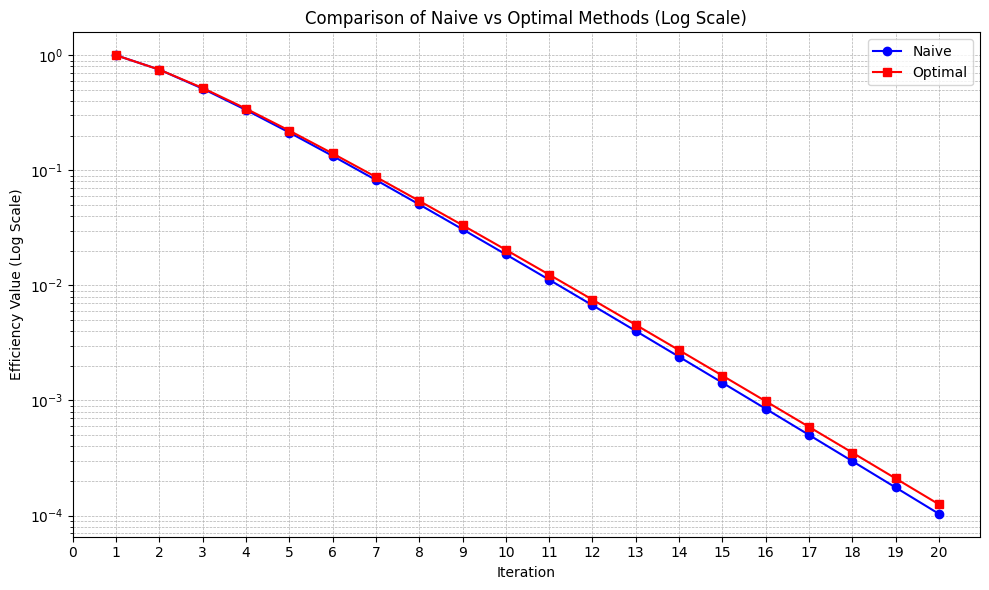

In [38]:
# Plotting the data with y-axis in log scale
plt.figure(figsize=(10, 6))
plt.plot(x, naive, marker='o', label='Naive', linestyle='-', color='blue')
plt.plot(x, optimal, marker='s', label='Optimal', linestyle='-', color='red')

# Setting the y-axis to log scale
plt.yscale('log')

# Adding details
plt.title("Comparison of Naive vs Optimal Methods (Log Scale)")
plt.xlabel("Iteration")
plt.ylabel("Efficiency Value (Log Scale)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, n+1, 1))
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
@cache
def P(n: int = 1) -> float | Rational:
    if n in [0, 1]:
        return 1
    s = 0
    I = [0]
    for i in range(0, n - 1):
        I.append(limit(n,i).evalf())
    I.append(1)
    for i in range(n):
        s += ʃ(pnb(n,i), (n1, Interval(I[i], I[i + 1]))) 
    return s

In [36]:
from functools import cache
from math import comb

from sympy import Expr, Interval, Rational, Symbol
from sympy import integrate as ʃ
from sympy import solve

n1 = Symbol("n1", domain=Interval(0, 1))

@cache
def P(n: int = 1) -> float | Rational:
    if n in [0, 1]:
        return 1
    s = 0
    I = [0]
    for i in range(0, n - 1):
        I.append(limit(n,i).evalf())
    I.append(1)
    for i in range(n):
        s += ʃ(pnb(n,i), (n1, Interval(I[i], I[i + 1]))) 
    return s

def limit(n, i):
    sol = solve(pnb(n,i+1) - pnb(n,i), n1)
    sol = sol[1] if sol[0] == 0 else sol[0]
    return sol

def pnb(n,i):
    return binomial(n - 1, i) * P(n - 1 - i) * P(i)

def binomial(n: int, k: int) -> Expr:  
    return comb(n, k) * (1 - n1) ** (n - k) * n1 ** (k)
P(5)

0.221406029897821

In [118]:
from functools import cache
from math import comb

from sympy import Expr, Interval, Rational, Symbol
from sympy import integrate as ʃ
from sympy import solve

n1 = Symbol("n1", domain=Interval(0, 1))

@cache
def P(n: int = 1) -> float | Rational:
    if n in [0, 1]:
        return 1
    s, l = 0, 0
    for i in range(n):
        r = thresholds(n, i)
        s += ʃ(pnb(n-1, i), (n1, Interval(l, r)))
        l = r
    return s

def thresholds(n, i):
    if (n-1)==i:
        return 1
    sol = solve(pnb(n-1,i+1) - pnb(n-1,i), n1)
    return (sol[1] if sol[0] == 0 else sol[0]).evalf()

def pnb(n,i):
    return binomial(n, i) * P(n - i) * P(i)

def binomial(n: int, k: int) -> Expr:  
    return comb(n, k) * (1 - n1) ** (n - k) * n1 ** (k)
P(5)

0.221406029897821

In [11]:
from math import comb
from sympy import Expr, Interval, Rational, Symbol
from sympy import integrate as ʃ
from sympy import solve

n1 = Symbol("n1", domain=Interval(0, 1))
p_values = [1, 1]

def binomial(n: int, k: int) -> Expr:  
    return comb(n, k) * (1 - n1) ** (n - k) * n1 ** k

def pnb(n, i):
    return binomial(n, i) * p_values[n - i] * p_values[i]

def thresholds(n, i):
    if (n - 1) == i:
        return 1
    sol = solve(pnb(n - 1, i + 1) - pnb(n - 1, i), n1)
    return (sol[1] if sol[0] == 0 else sol[0]).evalf()

def Pn(n_max: int = 1) -> float | Rational:
    for n in range(2, n_max + 1):
        s, l = 0, 0
        for i in range(n):
            r = thresholds(n, i)
            s += ʃ(pnb(n - 1, i), (n1, Interval(l, r)))
            l = r
        p_values.append(s)
    return p_values[n_max]

# Example usage:
result = Pn(5)
print(result)


0.221406029897821


In [168]:
from math import comb
import numpy as np  

prec = 1001
n1 = np.linspace(0,1,prec)
p_values = [1, 1]

def binomial(n: int, k: int) -> Expr:  
    return comb(n, k) * (1 - n1) ** (n - k) * n1 ** k

def pnb(n, i):
    return binomial(n, i) * p_values[n - i] * p_values[i]

def thresholds(n, i, l):
    if (n - 1) == i:
        return prec
    return np.argmin(np.abs(pnb(n - 1, i + 1)[l+1:] - pnb(n - 1, i)[l+1:]))+l+1

def Pn(n_max: int = 1) -> float | Rational:
    for n in range(2, n_max + 1):
        s, l = 0, 0
        for i in range(n):
            r = thresholds(n, i, l)
            print(l, r )
            s += np.sum(pnb(n - 1, i)[l:r]/prec)
            l = r
        p_values.append(s)
    return p_values[n_max]

# Example usage:
result = Pn(5)
print(result)


0 500
500 1001
0 1000


ValueError: attempt to get argmin of an empty sequence

In [142]:
thresholds(2, 0)

0.5


500

In [63]:
from functools import lru_cache
from math import comb
from scipy.integrate import quad
from scipy.optimize import brentq
import numpy as np

@lru_cache(maxsize=None)
def P(n: int) -> float:
    if n <= 1:
        return 1.0
    s, l = 0.0, 0.0
    for i in range(n):
        r = thresholds(n, i)
        if r <= l:
            continue
        integral = integrate_pnb(n - 1, i, l, r)
        s += integral
        l = r
    return s

def thresholds(n, i):
    if (n - 1) == i:
        return 1.0
    def func(n1):
        return pnb(n - 1, i + 1, n1) - pnb(n - 1, i, n1)
    
    # Ensure that func(n1) has opposite signs at the endpoints
    a, b = 0.0, 1.0
    fa, fb = func(a), func(b)
    if fa * fb >= 0:
        # If the function does not cross zero, return mid-point to avoid errors
        return (a + b) / 2
    root = brentq(func, a, b)
    return root

def integrate_pnb(n, i, l, r):
    if l >= r:
        return 0.0
    def integrand(n1):
        return pnb(n, i, n1)
    result, _ = quad(integrand, l, r, limit=100, epsabs=1e-8)
    return result

def pnb(n, i, n1):
    p_binom = binomial(n, i, n1)
    p_n_i = P(n - i)
    p_i = P(i)
    # Ensure that the probabilities are non-negative
    return max(0.0, p_binom * p_n_i * p_i)

def binomial(n: int, k: int, n1: float):
    if n1 == 0.0 and k > 0:
        return 0.0
    if n1 == 1.0 and k < n:
        return 0.0
    try:
        return comb(n, k) * (1 - n1) ** (n - k) * n1 ** k
    except ValueError:
        return 0.0

# Example usage:
for n in range(21):
    print(f"P({n}) = {P(n)}")


In [16]:
pnb(2,0).evalf()

1.0 - n1

In [34]:
n1 = Symbol("n1", domain=Interval(0, 1))

In [47]:
ʃ(pnb(2, 0, n1), [n1, 0,1])

1/2

TypeError: Can't instantiate abstract class StreamSort without an implementation for abstract methods 'mP', 'p_distributions', 'thresholds'

In [12]:
from math import comb
from sympy import Expr, Interval, Rational, Symbol
from sympy import integrate as ʃ
from sympy import solve

n1 = Symbol("n1", domain=Interval(0, 1))
p_values = [1, 1]

def binomial(n: int, k: int) -> Expr:  
    return comb(n, k) * (1 - n1) ** (n - k) * n1 ** k

def pnb(n, i):
    return binomial(n, i) * p_values[n - i] * p_values[i]

def thresholds(n, i):
    if (n - 1) == i:
        return 1
    sol = solve(pnb(n - 1, i + 1) - pnb(n - 1, i), n1)
    return (sol[1] if sol[0] == 0 else sol[0]).evalf()

def Pn(n_max: int = 1) -> float | Rational:
    for n in range(2, n_max + 1):
        s, l = 0, 0
        for i in range(n):
            r = thresholds(n, i)
            s += ʃ(pnb(n - 1, i), (n1, Interval(l, r)))
            l = r
        p_values.append(s)
    return p_values[n_max]

# Example usage:
result = Pn(5)
print(result)


0.221406029897821


In [71]:
thres = [0] + [float(thresholds(6,i)) for i in range(6)] 

In [76]:
thres

[0,
 0.11416642669432928,
 0.3060856885686834,
 0.5,
 0.693914311431316,
 0.885833573305671,
 1.0]

In [75]:
print(
"""
\\usepgfplotslibrary{fillbetween}

\\begin{figure}
\\centering
\\begin{tikzpicture}[scale=0.6]
    \\begin{axis}[
        every axis plot/.append style={line width=0.775pt},
        title=,
        width=\\linewidth,
        height=\\axisdefaultheight,
        xlabel=$s_1$,
        ylabel={$\\opt(M, N)$},
        xmin=0, xmax=1,
        ymin=0.00000001, ymax=0.3,
        legend pos=north east,
        ymajorgrids=true,
        grid style=dashed,
        %ymode=log
    ]
"""
)

for i, col in zip(range(6),["blue","orange","green","red","purple","brown","pink"]):
    print(f"\\addplot[color={col},name path={col}]coordinates") # line width=0.775pt
    print("{")
    for x in np.linspace(thres[i],thres[i+1], 30):
        print(f"   ({x}, {pnb(5,i).subs(n1, x)})")
    print("};")

    #print("""
    #\\path[name path=axis] (axis cs:0,0) -- (axis cs:0.03,0);
    #\\addplot [fill=gray!30] fill between [of=line and axis];
    #"""
    #)

print("""
\\legend{$Slot 1$, $Slot 2$, $Slot 3$, $Slot 4$,$Slot 5$, $Slot 6$}
\\end{axis}
\\end{tikzpicture}
\\caption{Optimal probability of winning for given a $s1$ placed at each slot}
\\end{figure}
"""
)


\usepgfplotslibrary{fillbetween}

\begin{figure}
\centering
\begin{tikzpicture}[scale=0.6]
    \begin{axis}[
        every axis plot/.append style={line width=0.775pt},
        title=,
        width=\linewidth,
        height=\axisdefaultheight,
        xlabel=$s_1$,
        ylabel={$\opt(M, N)$},
        xmin=0, xmax=1,
        ymin=0.00000001, ymax=0.3,
        legend pos=north east,
        ymajorgrids=true,
        grid style=dashed,
        %ymode=log
    ]

\addplot[color=blue,name path=blue]coordinates
{
   (0.0, 0.221406029897821)
   (0.003936773334287216, 0.217082082219181)
   (0.007873546668574432, 0.212825955569328)
   (0.011810320002861648, 0.208636848972696)
   (0.015747093337148865, 0.204513967785114)
   (0.01968386667143608, 0.200456523668680)
   (0.023620640005723295, 0.196463734566645)
   (0.027557413340010512, 0.192534824678280)
   (0.03149418667429773, 0.188669024433762)
   (0.03543096000858494, 0.184865570469044)
   (0.03936773334287216, 0.181123705600737)
   (0.04

In [92]:
print(""" 
\\addplot[
    only marks,
    mark=square*,
    color=blue,
    line width=1pt
] coordinates {
    """)
for n in range(8):
    print()
    for i in range(n-2):
        print(f"({n-1},{float(thresholds(n-1,i))})")

print(""" 
    \\addlegendentry{Scatter 1}
    """)

 
    \addplot[
        only marks,
        mark=square*,
        color=blue,
        line width=1pt
    ] coordinates {
    




(2,0.5)

(3,0.2727272727272727)
(3,0.7272727272727273)

(4,0.18751554339716495)
(4,0.5)
(4,0.8124844566028351)

(5,0.1419347568217685)
(5,0.38097644160929756)
(5,0.6190235583907029)
(5,0.8580652431782313)

(6,0.11416642669432928)
(6,0.3060856885686834)
(6,0.5)
(6,0.693914311431316)
(6,0.885833573305671)
 
    \addlegendentry{Scatter 1}
    
